In [1]:
!pip -q install tensorflow==2.3.1 tensorflow-quantum

# % ls
import cirq
import sympy
import numpy as np
import tensorflow as tf
import tensorflow_quantum as tfq

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
np.random.seed(1234)

     |████████████████████████████████| 320.4MB 51kB/s 
     |████████████████████████████████| 5.9MB 22.7MB/s 
     |████████████████████████████████| 20.1MB 1.4MB/s 
     |████████████████████████████████| 460kB 41.2MB/s 
     |████████████████████████████████| 5.6MB 24.0MB/s 
     |████████████████████████████████| 1.6MB 51.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf 
import matplotlib.pylab as plt 
import skimage
import glob
import h5py   

from pandas import DataFrame, read_csv   
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold 
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from astropy.table import Table 
from PIL import Image  
from skimage import data, io
from skimage.transform import rescale, resize, downscale_local_mean 
from matplotlib import pyplot
from IPython.display import Image 

from matplotlib import pyplot as plt
from scipy.signal import convolve2d 
from sklearn.preprocessing import StandardScaler 
from tensorflow import keras 
from random import randint 

In [3]:
%cd 



gw_aug = '1tbOPduVlNrKX-D3AALsUOWR9NBuFAQyu'
nd_aug = '1ukwfUxQZQ9zfSfBvZz4h8cj5gkh0gXUL' 

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

gw_augfileName = gw_aug + '.npy'
nd_augfileName = nd_aug + '.npy' 

downloaded = drive.CreateFile({'id': gv})
downloaded.GetContentFile(gvfileName) 

downloaded = drive.CreateFile({'id': ligo})
downloaded.GetContentFile(ligofileName) 

downloaded = drive.CreateFile({'id': phs})
downloaded.GetContentFile(phsfileName)  

downloaded = drive.CreateFile({'id': diagram})
downloaded.GetContentFile(diagramfileName)  

downloaded = drive.CreateFile({'id': gw_aug})
downloaded.GetContentFile(gw_augfileName)  

downloaded = drive.CreateFile({'id': nd_aug})
downloaded.GetContentFile(nd_augfileName)    

/root


In [4]:
GW = np.load(gw_augfileName) # gravitational wave events
ND = np.load(nd_augfileName) # non gravitational wave events


In [5]:
GW

array([[[[4.40088061e-01, 6.70719595e-01],
         [8.31678164e-01, 6.92243973e-01],
         [1.18034397e+00, 3.72359693e-01],
         ...,
         [6.94007940e-01, 4.78517085e-01],
         [4.40683666e-01, 1.06523033e+00],
         [2.74037119e-01, 1.88242279e+00]],

        [[4.39855950e-01, 2.48092837e+00],
         [2.67759332e-01, 2.22739754e+00],
         [1.69509949e-01, 1.80244592e+00],
         ...,
         [2.11625151e-01, 6.34982201e-01],
         [2.38124135e-01, 1.25608607e+00],
         [2.79007981e-01, 2.20976719e+00]],

        [[4.08622148e-01, 4.73500725e+00],
         [2.46888576e-01, 4.15423558e+00],
         [1.50639769e-01, 3.41470641e+00],
         ...,
         [1.46259441e-02, 2.25408640e+00],
         [2.65921151e-02, 3.01328437e+00],
         [5.00013329e-02, 3.52147071e+00]],

        ...,

        [[1.20140751e+00, 2.08951706e-01],
         [9.81130872e-01, 3.23213554e-01],
         [6.55807705e-01, 3.62339017e-01],
         ...,
         [2.10170380e

In [6]:
GW.shape, ND.shape

((1568, 39, 100, 2), (1216, 39, 100, 2))

In [7]:
def plot_event(event=0, data=GW): 
    fig, ax = plt.subplots(1,2,figsize=(5,5))
    ax[0].imshow(data[event,:,:,0])
    ax[0].set_title('Event {} - H1'.format(event))
    ax[1].imshow(data[event,:,:,1])
    ax[1].set_title('Event {} - L1'.format(event));


As shown below gravitational waves are usually detected identically at both H1 and L1 locations. Few waves are more amplified at one location than at the other. If we consider the locations as channels for our spectogram images, the classifier should not have much issues dealing with such different signatures of the same event. In fact they can be complementary, like channels in a RGB image.

The code below plots 5 randomly chosen events, left at H1 and rigth at L1.

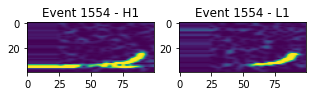

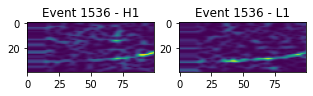

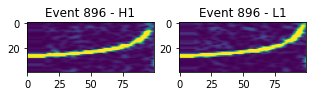

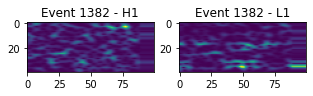

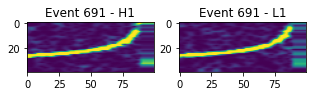

In [8]:
for e in range(5):
    e = randint(0, GW.shape[0])
    plot_event(e)
    

Non-gravitational waves (noise) are depicted below.



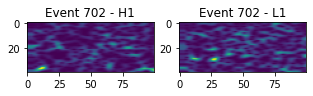

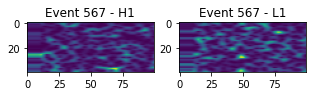

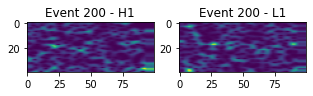

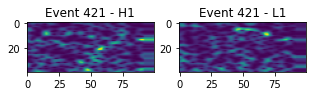

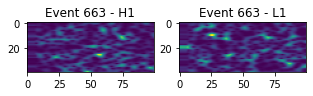

In [9]:
for e in range(5):
    e = randint(0, ND.shape[0])
    plot_event(e, data=ND) 

**Outliers**

As seen below we probably have few outliers in the data. They relate to frequency components with power around 25.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


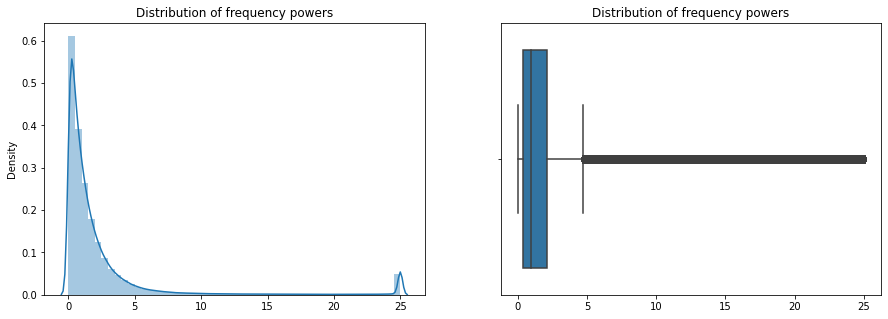

In [10]:
import seaborn as sns

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(GW.flatten(), ax=ax[0])
ax[0].set_title('Distribution of frequency powers')
sns.boxplot(np.unique(GW), ax=ax[1])
ax[1].set_title('Distribution of frequency powers');

The function below helps us finding the outliers in the GW dataset. We did not handle the outliers since we did not find enough literature describing the units and shape of the data.



In [11]:
def clean_events(data=GW, threshold=20):
    data_clean = data.copy()
    outliers = np.where(data>threshold)
    outliers_idx = list(zip(outliers[0], outliers[1], outliers[2], outliers[3]))
    return outliers_idx

In [12]:
clean_events(GW)

[(0, 24, 66, 1),
 (0, 24, 67, 1),
 (0, 24, 68, 1),
 (0, 24, 69, 1),
 (0, 24, 70, 1),
 (0, 24, 71, 1),
 (0, 25, 65, 1),
 (0, 25, 66, 1),
 (0, 25, 67, 1),
 (0, 25, 68, 1),
 (0, 25, 69, 1),
 (0, 25, 70, 1),
 (0, 26, 64, 1),
 (0, 26, 65, 1),
 (0, 26, 66, 1),
 (0, 26, 67, 1),
 (0, 26, 68, 1),
 (0, 26, 69, 1),
 (0, 27, 63, 1),
 (0, 27, 64, 1),
 (0, 27, 65, 1),
 (0, 27, 66, 1),
 (0, 27, 67, 1),
 (0, 27, 68, 1),
 (0, 27, 69, 1),
 (0, 28, 60, 1),
 (0, 28, 61, 1),
 (0, 28, 62, 1),
 (0, 28, 63, 1),
 (0, 28, 64, 1),
 (0, 28, 65, 1),
 (0, 28, 66, 1),
 (0, 28, 67, 1),
 (0, 28, 68, 1),
 (0, 29, 58, 1),
 (0, 29, 59, 1),
 (0, 29, 60, 1),
 (0, 29, 61, 1),
 (0, 29, 62, 1),
 (0, 29, 63, 1),
 (0, 29, 64, 1),
 (0, 29, 65, 1),
 (0, 29, 66, 1),
 (0, 29, 67, 1),
 (0, 30, 55, 1),
 (0, 30, 56, 1),
 (0, 30, 57, 1),
 (0, 30, 58, 1),
 (0, 30, 59, 1),
 (0, 30, 60, 1),
 (0, 30, 61, 1),
 (0, 30, 62, 1),
 (0, 30, 63, 1),
 (0, 30, 64, 1),
 (0, 30, 65, 1),
 (0, 31, 46, 1),
 (0, 31, 47, 1),
 (0, 31, 52, 1),
 (0, 31, 53, 1

As shown below there is no obvious outliers in the non-gravitational events.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


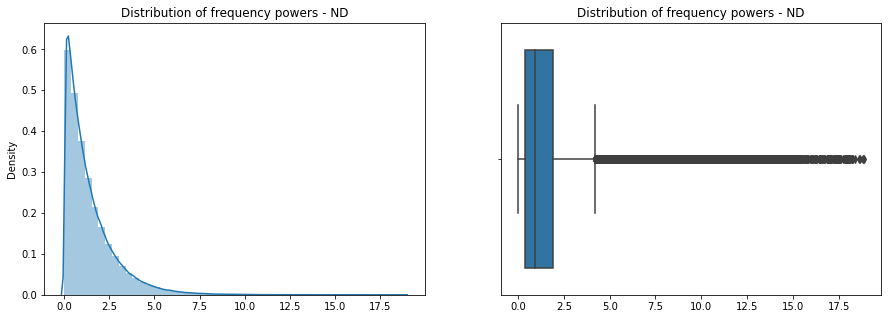

In [13]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(ND.flatten(), ax=ax[0])
ax[0].set_title('Distribution of frequency powers - ND')
sns.boxplot(np.unique(ND), ax=ax[1])
ax[1].set_title('Distribution of frequency powers - ND');

combine and prepare them for the NN by 
1. making a numerical response variable that is 1 for GWs and 0 for ND 
 
2. splitting in X_train, y_train, X_test, and y_test. Have 20% of your data be in the test set.

We normalize and shuffle the GWs and ND.

In [14]:
GW = GW.astype('float32')/np.max(GW)
ND = ND.astype('float32')/np.max(ND)
np.random.shuffle(GW)
np.random.shuffle(ND)


We combine the GWs with ND. We create the response vector.



In [15]:
X = np.append(GW, ND, axis=0)
Y = np.append(np.ones((GW.shape[0],1)), np.zeros((ND.shape[0],1)), axis=0)
X.shape, Y.shape, GW.shape, ND.shape


((2784, 39, 100, 2), (2784, 1), (1568, 39, 100, 2), (1216, 39, 100, 2))

We split the data as 20% test, 80% train. 

In [16]:
test_idx = np.random.choice(np.arange(0, Y.shape[0], 1), size=round(.2*Y.shape[0]), replace=False)
train_idx = np.setdiff1d(np.arange(0, Y.shape[0], 1), test_idx)
test_idx.shape, train_idx.shape 

((557,), (2227,))

In [17]:
X_train = X[train_idx]
y_train = Y[train_idx]
X_test = X[test_idx]
y_test = Y[test_idx]

In [18]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape 

((557, 39, 100, 2), (557, 1), (2227, 39, 100, 2), (2227, 1))

In [19]:
np.unique(y_test) 

array([0., 1.])

In [20]:
X_train

array([[[[1.04768753e-01, 3.56609188e-02],
         [9.80831534e-02, 2.89870389e-02],
         [7.80133680e-02, 1.75911896e-02],
         ...,
         [8.45239609e-02, 5.80501892e-02],
         [1.31419063e-01, 4.10756916e-02],
         [1.51769280e-01, 2.38482449e-02]],

        [[8.60574916e-02, 6.51985267e-03],
         [5.54018840e-02, 1.97968259e-02],
         [2.93397736e-02, 3.27112116e-02],
         ...,
         [9.96040553e-02, 8.91238749e-02],
         [1.36812046e-01, 7.57434890e-02],
         [1.38371050e-01, 5.30442037e-02]],

        [[1.46266758e-01, 2.91348957e-02],
         [8.51880610e-02, 3.67202796e-02],
         [4.74591777e-02, 4.49374728e-02],
         ...,
         [1.72021046e-01, 5.90887591e-02],
         [1.74478948e-01, 5.37822433e-02],
         [1.53024018e-01, 4.73497957e-02]],

        ...,

        [[2.96566915e-02, 2.34176725e-01],
         [6.05086386e-02, 2.56718636e-01],
         [8.98640752e-02, 2.58228600e-01],
         ...,
         [4.62872488e

**The following function creates a flexible CNN architecture:**

* Conv2D adds a convolution layer with a variable number of filters and filter size.
* L2 regularization is used to avoid overfitting. This means that large weights are penalized by a factor slightly less than 1 prior to each update.
* BatchNormalization maintains the mean activation in mini-batch close to 0 and the activation standard deviation close to 1 in order to solve the internal covariate shift. This allows our network to converge faster.
* MaxPooling2D layers downsample the feature maps in order to identify the most important features.
* Dropout works by randomly ignoring some nodes, and forcing the remaining nodes to learn other features. This improves the generalization capability of our network.

In [22]:
def create_cnn(input_shape, nb_classes,nb_blocks, nb_filters, filter_size, 
               pool_size, weight_decay, padding, dropout, output_activation):

    model = tf.keras.Sequential()

    for i in range(nb_blocks):
        if i==0:
          model.add(tf.keras.layers.Conv2D(nb_filters, filter_size, activation='relu', 
                                                padding=padding, kernel_regularizer=tf.keras.regularizers.l2(weight_decay), input_shape=input_shape))
        else:
            model.add(tf.keras.layers.Conv2D(nb_filters, filter_size, activation='relu', 
                                              padding=padding, kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))        
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Conv2D(nb_filters, filter_size, activation='relu', 
                                      padding=padding, kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size))
    model.add(tf.keras.layers.Dropout(dropout))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(nb_classes, activation=output_activation))

    return model

**Build a CNN Model to automatically classify event as a GW or an ND**

we are going to use the above defined function to classify them.

In [23]:
cnn_gw = create_cnn(input_shape=X_train.shape[1:], nb_classes=1, nb_blocks=2, nb_filters=32, filter_size=(3,3), 
                    pool_size=(2,2), weight_decay=1e-4, padding='same', dropout=.3, output_activation='sigmoid')
cnn_gw.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 39, 100, 32)       608       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 100, 32)       9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 39, 100, 32)       128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 100, 32)       9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 100, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 19, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 50, 32)        0

In [24]:
opt_rms = tf.keras.optimizers.RMSprop(lr=0.01, decay=1e-6)
cnn_gw.compile(loss='binary_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
batch_size = 64
epochs = 500 

In [25]:
cnn_gw_history = cnn_gw.fit(X_train,  y_train, batch_size=batch_size,  epochs=epochs, verbose=1,  validation_data=(X_test, y_test))

Epoch 1/500
35/35 [==============================] - 1s 21ms/step - loss: 1.6406 - accuracy: 0.9407 - val_loss: 4.5423 - val_accuracy: 0.6140
Epoch 2/500
35/35 [==============================] - 0s 14ms/step - loss: 0.1814 - accuracy: 0.9888 - val_loss: 16.4485 - val_accuracy: 0.7828
Epoch 3/500
35/35 [==============================] - 0s 14ms/step - loss: 0.1009 - accuracy: 0.9924 - val_loss: 41.9071 - val_accuracy: 0.7145
Epoch 4/500
35/35 [==============================] - 0s 13ms/step - loss: 0.0446 - accuracy: 0.9969 - val_loss: 24.9043 - val_accuracy: 0.7451
Epoch 5/500
35/35 [==============================] - 0s 14ms/step - loss: 0.1345 - accuracy: 0.9942 - val_loss: 40.3023 - val_accuracy: 0.7379
Epoch 6/500
35/35 [==============================] - 0s 14ms/step - loss: 0.0261 - accuracy: 0.9996 - val_loss: 11.0267 - val_accuracy: 0.8276
Epoch 7/500
35/35 [==============================] - 0s 14ms/step - loss: 0.1233 - accuracy: 0.9942 - val_loss: 0.8487 - val_accuracy: 0.9587
E

In [26]:
test_loss, test_acc = cnn_gw.evaluate(X_test, y_test, verbose=2)

18/18 - 0s - loss: 41.4426 - accuracy: 0.6104


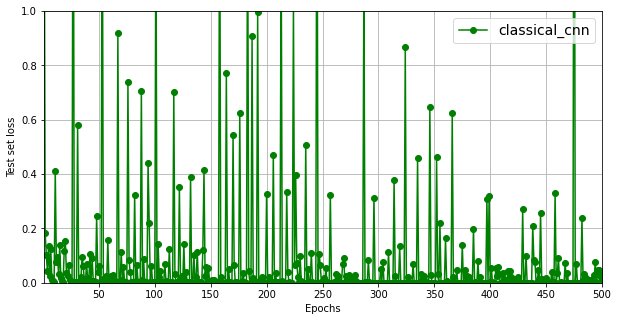

In [27]:
import matplotlib as mpl
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(cnn_gw_history.history['loss'])) + 1, cnn_gw_history.history['loss'], "go-", label="classical_cnn") 
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
plt.axis([1, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)
# fig.savefig('loss.png', dpi=300) 

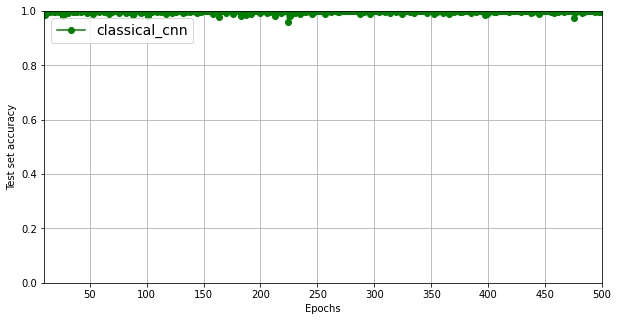

In [28]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(cnn_gw_history.history['accuracy'])) + 1, cnn_gw_history.history['accuracy'], "go-", label="classical_cnn") 
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)


In [ ]:
def plot_cnn(cnn_history):
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
    ax[0].plot(np.sqrt(cnn_history.history['accuracy']), 'r', label='train_acc')
    ax[0].plot(np.sqrt(cnn_history.history['val_accuracy']), 'b' ,label='val_acc')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend()
    ax[0].tick_params()
    ax[0].set_title('CNN training performance');
    ax[1].plot(np.sqrt(cnn_history.history['loss']), 'r', label='train_loss')
    ax[1].plot(np.sqrt(cnn_history.history['val_loss']), 'b' ,label='val_loss')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Loss')
    ax[1].legend()
    ax[1].tick_params()
    ax[1].set_title('CNN training performance');
    print('Average Accuracy: training {0:0.2%}, validation {1:0.2%}'.format(np.mean(cnn_history.history['accuracy']), np.mean(cnn_history.history['val_accuracy'])))

Validation accuracy is an important way to ensure the model is performing well. After a short training, the CNN model is already achieving 79.54% classification accuracy on unseen events.

Average Accuracy: training 99.78%, validation 81.40%


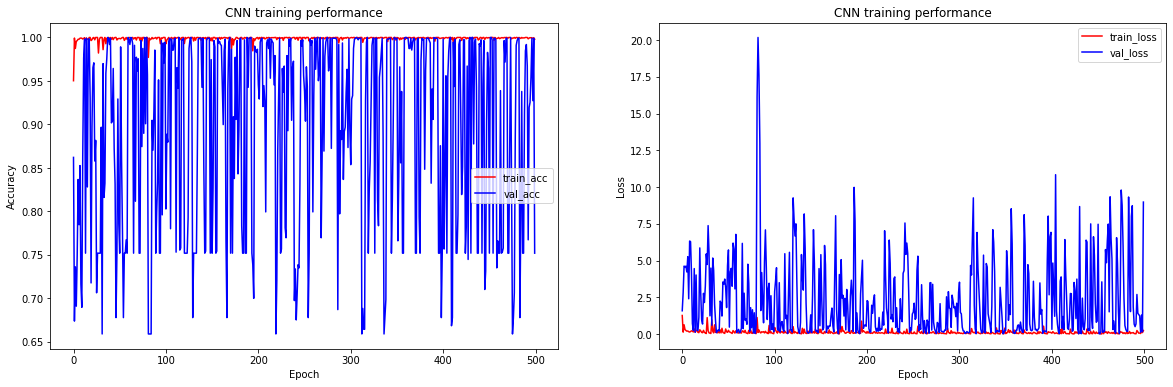

In [ ]:
plot_cnn(cnn_gw_history) 

# PQK features


In [29]:
def truncate_x(x_train, x_test, n_components=10):
  """Perform PCA on image dataset keeping the top `n_components` components."""
  n_points_train = tf.gather(tf.shape(x_train), 0)
  n_points_test = tf.gather(tf.shape(x_test), 0)

  # Flatten to 1D
  x_train = tf.reshape(x_train, [n_points_train, -1])
  x_test = tf.reshape(x_test, [n_points_test, -1])

  # Normalize.
  feature_mean = tf.reduce_mean(x_train, axis=0)
  x_train_normalized = x_train - feature_mean
  x_test_normalized = x_test - feature_mean

  # Truncate.
  e_values, e_vectors = tf.linalg.eigh(
      tf.einsum('ji,jk->ik', x_train_normalized, x_train_normalized))
  return tf.einsum('ij,jk->ik', x_train_normalized, e_vectors[:,-n_components:]), \
    tf.einsum('ij,jk->ik', x_test_normalized, e_vectors[:, -n_components:])

In [30]:
DATASET_DIM = 10
X_train, X_test = truncate_x(X_train, X_test, n_components=DATASET_DIM)
print(f'New datapoint dimension:', len(X_train[0]))

New datapoint dimension: 10


In [31]:
X_train

<tf.Tensor: shape=(2227, 10), dtype=float32, numpy=
array([[ -0.64891326,   0.6049219 ,   0.34483486, ...,   3.0589447 ,
          8.835266  ,  -5.9189367 ],
       [ -0.48873344,  -0.06762481,   0.5924578 , ...,   3.492884  ,
         12.167604  ,  -6.582962  ],
       [ -1.32831   ,   4.655675  ,  -1.2897724 , ..., -15.822447  ,
          1.6106274 ,  -5.3690705 ],
       ...,
       [ -0.27692285,   0.4621727 ,   0.59674484, ...,   1.2118411 ,
         -2.6151853 ,  -1.3971035 ],
       [  0.03033222,   0.18278356,   0.14974299, ...,   0.90869635,
         -2.904588  ,  -0.85145545],
       [ -0.3049988 ,  -0.16052654,   0.76958114, ...,   0.90577555,
         -2.7459295 ,  -1.138628  ]], dtype=float32)>

In [32]:
N_TRAIN = 1000
N_TEST = 200
# N_TRAIN = 2227
# N_TEST = 557
X_train, X_test = X_train[:N_TRAIN], X_test[:N_TEST]
y_train, y_test = y_train[:N_TRAIN], y_test[:N_TEST]
print("New number of training examples:", len(X_train))
print("New number of test examples:", len(X_test))

New number of training examples: 1000
New number of test examples: 200


In [33]:
def single_qubit_wall(qubits, rotations):
  """Prepare a single qubit X,Y,Z rotation wall on `qubits`."""
  wall_circuit = cirq.Circuit()
  for i, qubit in enumerate(qubits):
    for j, gate in enumerate([cirq.X, cirq.Y, cirq.Z]):
      wall_circuit.append(gate(qubit) ** rotations[i][j])

  return wall_circuit

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


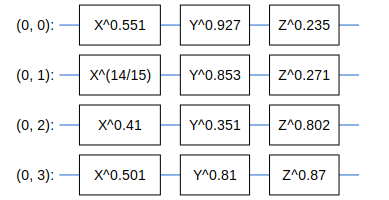

In [34]:
SVGCircuit(single_qubit_wall(
    cirq.GridQubit.rect(1,4), np.random.uniform(size=(4, 3))))

In [35]:
def v_theta(qubits):
  """Prepares a circuit that generates V(\theta)."""
  ref_paulis = [
      cirq.X(q0) * cirq.X(q1) + \
      cirq.Y(q0) * cirq.Y(q1) + \
      cirq.Z(q0) * cirq.Z(q1) for q0, q1 in zip(qubits, qubits[1:])
  ]
  exp_symbols = list(sympy.symbols('ref_0:'+str(len(ref_paulis))))
  return tfq.util.exponential(ref_paulis, exp_symbols), exp_symbols

Symbols found in circuit:[ref_0]


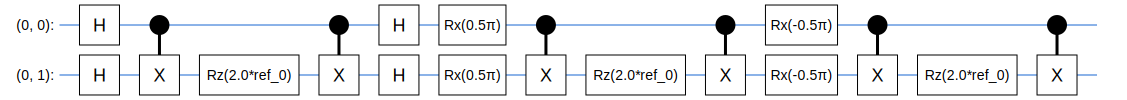

In [36]:
test_circuit, test_symbols = v_theta(cirq.GridQubit.rect(1, 2))
print(f'Symbols found in circuit:{test_symbols}')
SVGCircuit(test_circuit)

In [37]:
def prepare_pqk_circuits(qubits, classical_source, n_trotter=10):
  """Prepare the pqk feature circuits around a dataset."""
  n_qubits = len(qubits)
  n_points = len(classical_source)

  # Prepare random single qubit rotation wall.
  random_rots = np.random.uniform(-2, 2, size=(n_qubits, 3))
  initial_U = single_qubit_wall(qubits, random_rots)

  # Prepare parametrized V
  V_circuit, symbols = v_theta(qubits)
  exp_circuit = cirq.Circuit(V_circuit for t in range(n_trotter))
  
  # Convert to `tf.Tensor`
  initial_U_tensor = tfq.convert_to_tensor([initial_U])
  initial_U_splat = tf.tile(initial_U_tensor, [n_points])

  full_circuits = tfq.layers.AddCircuit()(
      initial_U_splat, append=exp_circuit)
  # Replace placeholders in circuits with values from `classical_source`.
  return tfq.resolve_parameters(
      full_circuits, tf.convert_to_tensor([str(x) for x in symbols]),
      tf.convert_to_tensor(classical_source*(n_qubits/3)/n_trotter))

In [38]:
qubits = cirq.GridQubit.rect(1, DATASET_DIM + 1)
q_x_train_circuits = prepare_pqk_circuits(qubits, X_train)
q_x_test_circuits = prepare_pqk_circuits(qubits, X_test)

In [39]:
def get_pqk_features(qubits, data_batch):
  """Get PQK features based on above construction."""
  ops = [[cirq.X(q), cirq.Y(q), cirq.Z(q)] for q in qubits]
  ops_tensor = tf.expand_dims(tf.reshape(tfq.convert_to_tensor(ops), -1), 0)
  batch_dim = tf.gather(tf.shape(data_batch), 0)
  ops_splat = tf.tile(ops_tensor, [batch_dim, 1])
  exp_vals = tfq.layers.Expectation()(data_batch, operators=ops_splat)
  rdm = tf.reshape(exp_vals, [batch_dim, len(qubits), -1])
  return rdm

In [40]:
x_train_pqk = get_pqk_features(qubits, q_x_train_circuits)
x_test_pqk = get_pqk_features(qubits, q_x_test_circuits)
print('New PQK training dataset has shape:', x_train_pqk.shape)
print('New PQK testing dataset has shape:', x_test_pqk.shape)

New PQK training dataset has shape: (1000, 11, 3)
New PQK testing dataset has shape: (200, 11, 3)


In [41]:
def compute_kernel_matrix(vecs, gamma):
  """Computes d[i][j] = e^ -gamma * (vecs[i] - vecs[j]) ** 2 """
  scaled_gamma = gamma / (
      tf.cast(tf.gather(tf.shape(vecs), 1), tf.float32) * tf.math.reduce_std(vecs))
  return scaled_gamma * tf.einsum('ijk->ij',(vecs[:,None,:] - vecs) ** 2)

def get_spectrum(datapoints, gamma=1.0):
  """Compute the eigenvalues and eigenvectors of the kernel of datapoints."""
  KC_qs = compute_kernel_matrix(datapoints, gamma)
  S, V = tf.linalg.eigh(KC_qs)
  S = tf.math.abs(S)
  return S, V

In [42]:
S_pqk, V_pqk = get_spectrum(
    tf.reshape(tf.concat([x_train_pqk, x_test_pqk], 0), [-1, len(qubits) * 3]))

S_original, V_original = get_spectrum(
    tf.cast(tf.concat([X_train, X_test], 0), tf.float32), gamma=0.005)

print('Eigenvectors of pqk kernel matrix:', V_pqk)
print('Eigenvectors of original kernel matrix:', V_original)

Eigenvectors of pqk kernel matrix: tf.Tensor(
[[ 0.03031104 -0.03635568  0.01058514 ...  0.04377194  0.04833964
   0.02960439]
 [ 0.00370454  0.04406492 -0.05016977 ...  0.0212464  -0.01327891
   0.0232407 ]
 [ 0.00638451  0.03751038  0.00782388 ...  0.02563383 -0.02800661
   0.02348411]
 ...
 [-0.05977648 -0.00298789  0.04075491 ... -0.19809113 -0.6334071
   0.0430136 ]
 [-0.06526309 -0.00232126 -0.06062193 ... -0.11745404  0.4807173
   0.0480125 ]
 [-0.05737307  0.00691659 -0.02979585 ...  0.          0.
   0.0370823 ]], shape=(1200, 1200), dtype=float32)
Eigenvectors of original kernel matrix: tf.Tensor(
[[-0.02381254 -0.02839068  0.03919818 ... -0.00509141  0.00345575
  -0.02625118]
 [-0.0205397  -0.04400484  0.0502192  ...  0.01800441  0.00041417
  -0.03000667]
 [-0.01150599 -0.0411518  -0.08624357 ... -0.01386573  0.01851885
  -0.03678741]
 ...
 [-0.02278954  0.02386406 -0.00385496 ... -0.05160787  0.13798246
  -0.01893413]
 [ 0.04306823  0.03276317  0.01067082 ... -0.20961572  0

In [43]:
def get_stilted_dataset(S, V, S_2, V_2, lambdav=1.1):
  """Prepare new labels that maximize geometric distance between kernels."""
  S_diag = tf.linalg.diag(S ** 0.5)
  S_2_diag = tf.linalg.diag(S_2 / (S_2 + lambdav) ** 2)
  scaling = S_diag @ tf.transpose(V) @ \
            V_2 @ S_2_diag @ tf.transpose(V_2) @ \
            V @ S_diag

  # Generate new lables using the largest eigenvector.
  _, vecs = tf.linalg.eig(scaling)
  new_labels = tf.math.real(
      tf.einsum('ij,j->i', tf.cast(V @ S_diag, tf.complex64), vecs[-1])).numpy()
  # Create new labels and add some small amount of noise.
  final_y = new_labels > np.median(new_labels)
  noisy_y = (final_y ^ (np.random.uniform(size=final_y.shape) > 0.95))
  return noisy_y

In [44]:
y_relabel = get_stilted_dataset(S_pqk, V_pqk, S_original, V_original)
y_train_new, y_test_new = y_relabel[:N_TRAIN], y_relabel[N_TRAIN:]

In [45]:
#docs_infra: no_execute
def create_pqk_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape=[len(qubits) * 3,]))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1))
    return model

pqk_model = create_pqk_model()
pqk_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              # optimizer=opt_rms,
              metrics=['accuracy'])

pqk_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1088      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________


In [46]:
#docs_infra: no_execute
pqk_history = pqk_model.fit(tf.reshape(x_train_pqk, [N_TRAIN, -1]),
          y_train_new,
          batch_size=32,
          epochs=500,
          verbose=2,
          validation_data=(tf.reshape(x_test_pqk, [N_TEST, -1]), y_test_new))

Epoch 1/500
32/32 - 0s - loss: 0.6660 - accuracy: 0.5930 - val_loss: 0.9120 - val_accuracy: 0.0650
Epoch 2/500
32/32 - 0s - loss: 0.6484 - accuracy: 0.5930 - val_loss: 1.0905 - val_accuracy: 0.0650
Epoch 3/500
32/32 - 0s - loss: 0.6268 - accuracy: 0.5930 - val_loss: 1.3568 - val_accuracy: 0.0650
Epoch 4/500
32/32 - 0s - loss: 0.6032 - accuracy: 0.6160 - val_loss: 1.5670 - val_accuracy: 0.0650
Epoch 5/500
32/32 - 0s - loss: 0.5807 - accuracy: 0.6420 - val_loss: 1.9115 - val_accuracy: 0.0650
Epoch 6/500
32/32 - 0s - loss: 0.5593 - accuracy: 0.6810 - val_loss: 2.2013 - val_accuracy: 0.0650
Epoch 7/500
32/32 - 0s - loss: 0.5453 - accuracy: 0.7050 - val_loss: 2.3681 - val_accuracy: 0.0650
Epoch 8/500
32/32 - 0s - loss: 0.5317 - accuracy: 0.7320 - val_loss: 2.6719 - val_accuracy: 0.0650
Epoch 9/500
32/32 - 0s - loss: 0.5248 - accuracy: 0.7260 - val_loss: 2.6988 - val_accuracy: 0.0650
Epoch 10/500
32/32 - 0s - loss: 0.5230 - accuracy: 0.7290 - val_loss: 2.8171 - val_accuracy: 0.0650
Epoch 11/

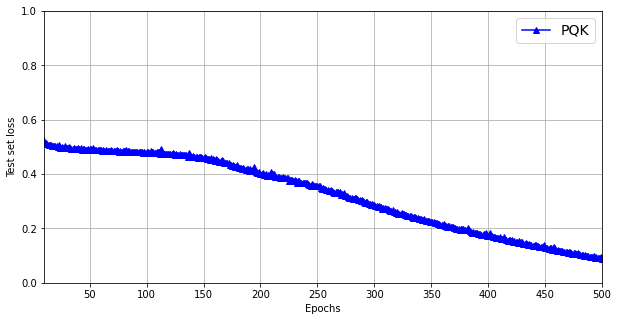

In [47]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(pqk_history.history['loss'])) + 1, pqk_history.history['loss'], "b^-", label="PQK")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)

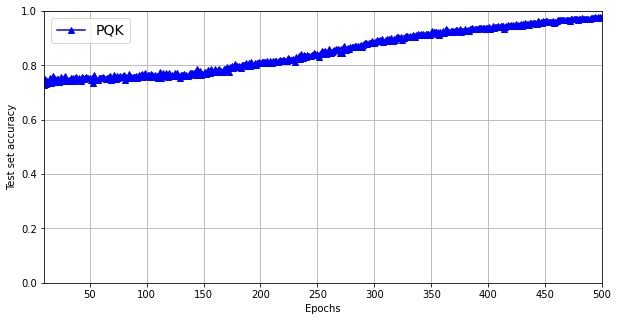

In [48]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(pqk_history.history['accuracy'])) + 1, pqk_history.history['accuracy'], "b^-", label="PQK")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)

In [49]:
#docs_infra: no_execute
def create_fair_classical_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape=[DATASET_DIM,]))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(1))
    return model

model = create_fair_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 897
Trainable params: 897
Non-trainable params: 0
_________________________________________________________________


In [50]:
#docs_infra: no_execute
classical_history = model.fit(X_train,
          y_train_new,
          batch_size=32,
          epochs=500,
          verbose=1,
          validation_data=(X_test, y_test_new))

Epoch 1/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5980 - val_loss: 0.8792 - val_accuracy: 0.0650
Epoch 2/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.5930 - val_loss: 0.8152 - val_accuracy: 0.0650
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.5900 - val_loss: 0.6228 - val_accuracy: 0.1550
Epoch 4/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6634 - accuracy: 0.5940 - val_loss: 0.7273 - val_accuracy: 0.0650
Epoch 5/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.5930 - val_loss: 0.7998 - val_accuracy: 0.0650
Epoch 6/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6526 - accuracy: 0.5930 - val_loss: 0.8056 - val_accuracy: 0.0650
Epoch 7/500
32/32 [==============================] - 0s 3ms/step - loss: 0.6460 - accuracy: 0.5930 - val_loss: 0.7186 - val_accuracy: 0.0700
Epoch 8/500
3

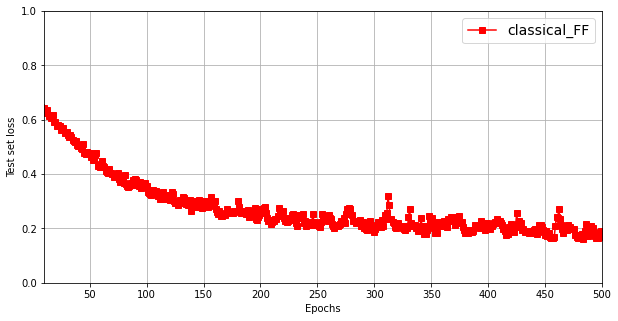

In [51]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(classical_history.history['loss'])) + 1, classical_history.history['loss'], "rs-", label="classical_FF")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)

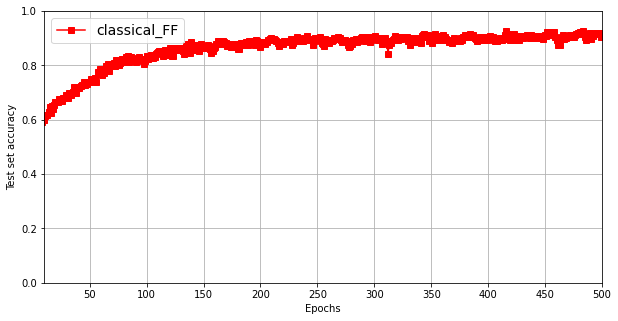

In [52]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(classical_history.history['accuracy'])) + 1, classical_history.history['accuracy'], "rs-", label="classical_FF")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)

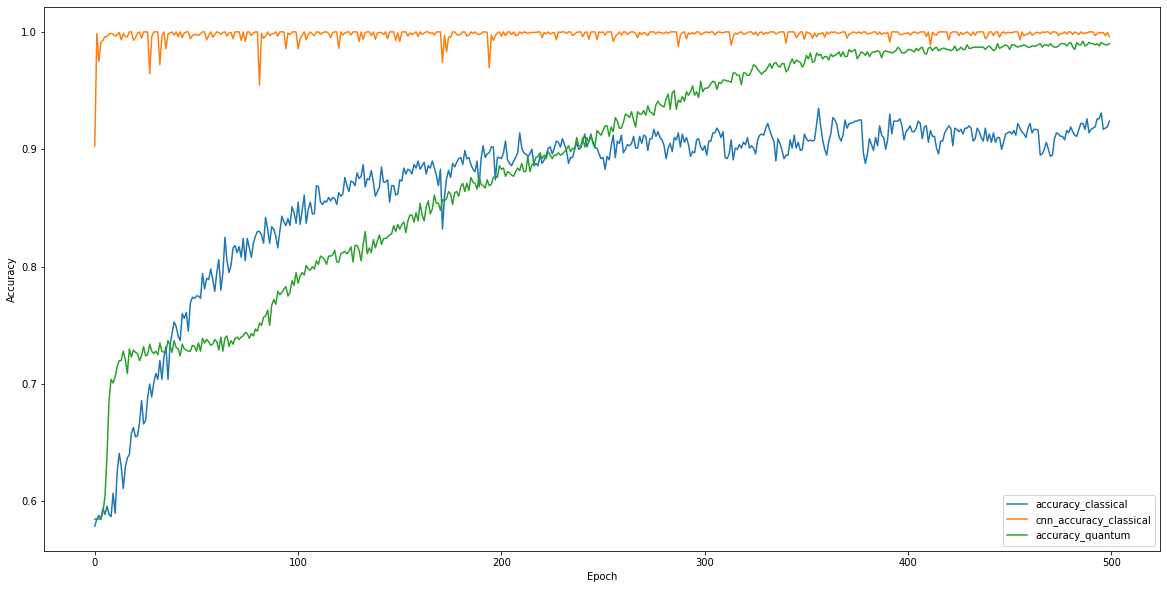

In [ ]:
#docs_infra: no_execute
plt.figure(figsize=(20,10))
plt.plot(classical_history.history['accuracy'], label='accuracy_classical')
# plt.plot(classical_history.history['val_accuracy'], label='val_accuracy_classical')

plt.plot(classical_cnn_history.history['accuracy'], label='cnn_accuracy_classical')
# plt.plot(cnn_gw_history.history['val_accuracy'], label='cnn_val_accuracy_classical')

plt.plot(classical_cnn_history.history['accuracy'], label='accuracy_quantum')
# plt.plot(pqk_history.history['val_accuracy'], label='val_accuracy_quantum')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

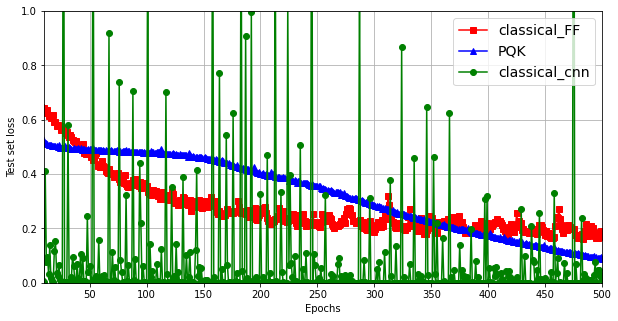

In [53]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(classical_history.history['loss'])) + 1, classical_history.history['loss'], "rs-", label="classical_FF")
plt.plot(np.arange(len(pqk_history.history['loss'])) + 1, pqk_history.history['loss'], "b^-", label="PQK")
plt.plot(np.arange(len(cnn_gw_history.history['loss'])) + 1, cnn_gw_history.history['loss'], "go-", label="classical_cnn")   
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set loss")
plt.grid(True)

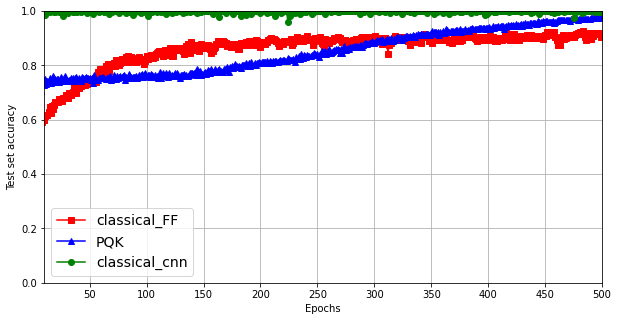

In [54]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(len(classical_history.history['accuracy'])) + 1, classical_history.history['accuracy'], "rs-", label="classical_FF")
plt.plot(np.arange(len(pqk_history.history['accuracy'])) + 1, pqk_history.history['accuracy'], "b^-", label="PQK")
plt.plot(np.arange(len(cnn_gw_history.history['accuracy'])) + 1, cnn_gw_history.history['accuracy'], "go-", label="classical_cnn")
plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True)) 
plt.axis([10, 500, 0, 1])
plt.legend(fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Test set accuracy")
plt.grid(True)